# Notebook to calculate spatial occupancy heatmaps

In [47]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

Scan parameters

In [2]:
radius = 400
t_range = 400 # (200 frames each direction)
num_bins = 10

In [4]:
occupancy = pickle.load( open( '/home/nathan/data/kraken/h2b/giulia/apoptosis_information/spatial_occupancy_weightmaps/follow/occupancy_dict.p', "rb" ) )

Calculating how much of the x axis (time) to trim from the spatial plots

In [11]:
dead_cell_duration_list = []
for i in occupancy:
    dead_cell_duration = occupancy[i]['frame_indices'][1]-occupancy[i]['apop_time']
    dead_cell_duration_list.append(dead_cell_duration)

In [12]:
dead_cell_duration_list

[4,
 8,
 3,
 209,
 1,
 159,
 151,
 19,
 147,
 3,
 15,
 87,
 19,
 196,
 58,
 8,
 561,
 9,
 19,
 13,
 55,
 2,
 20,
 10,
 3,
 11,
 109,
 9,
 228,
 4,
 17,
 2,
 45,
 9,
 283,
 283,
 2,
 38,
 161,
 23,
 23,
 2,
 4,
 9,
 3,
 1,
 3,
 15,
 12,
 350,
 15,
 115,
 5,
 210,
 68,
 6,
 95,
 16,
 3,
 2,
 14,
 5,
 1,
 10,
 12,
 7,
 124,
 362,
 109,
 1,
 1,
 3,
 13,
 38,
 2,
 53,
 2,
 1,
 80,
 10,
 3,
 144,
 3,
 0,
 0,
 32,
 19,
 9,
 16,
 16,
 5,
 2,
 18,
 3,
 1,
 36,
 1,
 27,
 227,
 4,
 8,
 186,
 4,
 84,
 212,
 11,
 23,
 4,
 16,
 1,
 1,
 348,
 6,
 10,
 14,
 12,
 52,
 1,
 3,
 11,
 1,
 2,
 406,
 5,
 3,
 7,
 242,
 11,
 29,
 15,
 3,
 7,
 6,
 204,
 0,
 102,
 4,
 2,
 3,
 14,
 19,
 6,
 246,
 4,
 1,
 247,
 266,
 198,
 4,
 46,
 9,
 5,
 256,
 5,
 9,
 0,
 1,
 21,
 2,
 183,
 4,
 3,
 68,
 116,
 71,
 0,
 182,
 7,
 5,
 2,
 186,
 17,
 3,
 386,
 30,
 126,
 3,
 3,
 297,
 264,
 237,
 4,
 12,
 5,
 0,
 3,
 0,
 102,
 11,
 18,
 0,
 290,
 290,
 347,
 2,
 7,
 33,
 42,
 477,
 4,
 47,
 212,
 4,
 43,
 43,
 511,
 181,
 16,
 307,


In [14]:
overlap = dead_cell_duration_list[-1]

In [16]:
overlap

69

In [15]:
occupancy[i]

{'frame_indices': (866, 1050),
 'apop_time': 981,
 'spatial_occupancy_v_time_heatmap': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        ...,
        [0.6620098 , 0.66145052, 0.6604696 , ..., 0.67730237, 0.67873223,
         0.67976364],
        [0.60574237, 0.60545467, 0.60491113, ..., 0.61338546, 0.61397595,
         0.61440758],
        [0.54914967, 0.55008957, 0.55271797, ..., 0.55826482, 0.55799562,
         0.55727825]])}

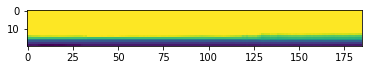

In [20]:
plt.imshow(occupancy[i]['spatial_occupancy_v_time_heatmap'])

In [21]:
hm = occupancy[i]['spatial_occupancy_v_time_heatmap']

In [42]:
hm.shape

(20, 185)

In [43]:
hm[:,0:-69].shape

(20, 116)

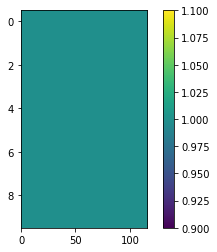

In [41]:
plt.imshow(hm[0:10,0:-69], aspect = 20)
plt.colorbar()

In [44]:
cropped_hm = hm[0:10,0:-69]
cropped_hm.shape

(10, 116)

In [45]:
cropped_hm[:,-1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# figuring out how to append zeros to before and after cell duration

In [123]:
test_array = np.zeros((10,116))
addition = np.ones((10,1))#np.expand_dims(cropped_hm[:,-1], axis =1)
test_array.shape, addition.shape

((10, 116), (10, 1))

In [83]:
new = np.append(test_array, addition, axis =1)

In [78]:
new.shape

(10, 117)

In [84]:
new

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [118]:
new = np.hstack((test_array, addition))

In [119]:
new.shape

(10, 117)

In [120]:
new

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [121]:
new = np.hstack((addition, test_array))

In [122]:
new

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [126]:
for i in range(0, 200-test_array.shape[1]):
    test_array = np.hstack((addition, test_array))
    #test_array = np.insert(test_array, (0,:), addition, axis =1)
for i in range(0,200):
    test_array = np.hstack((test_array, addition))
    #test_array = np.append(test_array, addition, axis = 1)
test_array.shape

(10, 400)

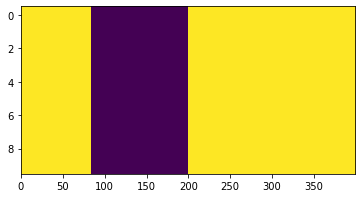

In [128]:
plt.imshow(test_array, aspect = 20)

In [143]:
test_array = np.zeros((10,116))
addition = np.zeros((10, int(t_range/2-test_array.shape[1])))
test_array.shape, addition.shape

((10, 116), (10, 84))

In [144]:
test_array = np.hstack((addition, test_array))
test_array.shape

(10, 200)

# applying that over all heatmaps

In [137]:
t_range = 400

In [188]:
for j, i in enumerate(occupancy):
    ### dead_cell_duration is the time spent as an apoptotic fragment after apoptosis time point
    dead_cell_duration = occupancy[i]['frame_indices'][1]-occupancy[i]['apop_time']
    ### cropped_hm has this excess fragment time cropped from the end of the heatmap
    cropped_hm = occupancy[i]['spatial_occupancy_v_time_heatmap'][0:10,0:-dead_cell_duration]
    ### crop again to trim front of heatmap if it exists >200
    if cropped_hm.shape[1] > 200:
        starting_index = cropped_hm.shape[1] -int(t_range/2)
        cropped_hm = cropped_hm[:,starting_index:]
    ### adding a pad of zeros to before the cell exists if it is younger than t_range/2 frames
    if cropped_hm.shape[1]<t_range/2:
        addition = np.zeros((10,int(t_range/2-cropped_hm.shape[1])))
        cropped_hm = np.hstack((addition, cropped_hm))
    ### continuing the weightmap as the last frame for t_range/2 after the cell exists
    final_slice = np.expand_dims(cropped_hm[:,-1], axis =1)
    for n in range(0,int(t_range/2)):
        cropped_hm = np.hstack((cropped_hm, final_slice))
    print(cropped_hm.shape)
    if j >5:
        break

(10, 400)
(10, 400)
(10, 400)
(10, 400)
(10, 400)
(10, 400)
(10, 400)


In [191]:
occupancy[i]

{'frame_indices': (578, 1161),
 'apop_time': 1010,
 'spatial_occupancy_v_time_heatmap': array([[0.5539009 , 0.59350773, 0.61604013, ..., 1.        , 1.        ,
         1.        ],
        [0.51800443, 0.53133374, 0.53900809, ..., 1.        , 1.        ,
         1.        ],
        [0.51080266, 0.51878488, 0.52335899, ..., 0.97897484, 0.971037  ,
         0.96511654],
        ...,
        [0.50154324, 0.50268355, 0.503337  , ..., 0.5508186 , 0.5498543 ,
         0.54918788],
        [0.50130276, 0.50130424, 0.50148773, ..., 0.54309443, 0.54133352,
         0.53695435],
        [0.46544343, 0.46296492, 0.46250538, ..., 0.48205137, 0.48091607,
         0.47806255]])}

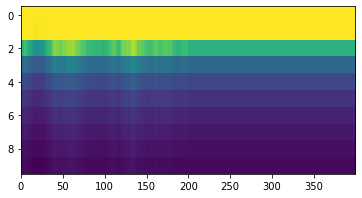

In [189]:
plt.imshow(cropped_hm, aspect = 20)

# to do

1. Bin in to num_bins
2. Weight each spatial bin according to area of ring
3. Check it makes sense

cropping a specific example weight map

In [192]:
for i in occupancy:
    if 'GV0807_Pos3' in i:
        print(i)

GV0807_Pos3_18_RFP
GV0807_Pos3_17_RFP
GV0807_Pos3_51_RFP
GV0807_Pos3_5_RFP
GV0807_Pos3_4_RFP


(10, 400)


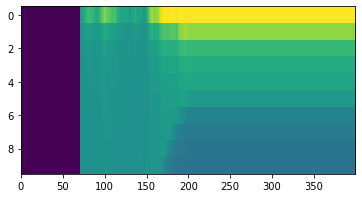

In [195]:
i = 'GV0807_Pos3_18_RFP'
dead_cell_duration = occupancy[i]['frame_indices'][1]-occupancy[i]['apop_time']
### cropped_hm has this excess fragment time cropped from the end of the heatmap
cropped_hm = occupancy[i]['spatial_occupancy_v_time_heatmap'][0:10,0:-dead_cell_duration]
### crop again to trim front of heatmap if it exists >200
if cropped_hm.shape[1] > 200:
    starting_index = cropped_hm.shape[1] -int(t_range/2)
    cropped_hm = cropped_hm[:,starting_index:]
### adding a pad of zeros to before the cell exists if it is younger than t_range/2 frames
if cropped_hm.shape[1]<t_range/2:
    addition = np.zeros((10,int(t_range/2-cropped_hm.shape[1])))
    cropped_hm = np.hstack((addition, cropped_hm))
### continuing the weightmap as the last frame for t_range/2 after the cell exists
final_slice = np.expand_dims(cropped_hm[:,-1], axis =1)
for n in range(0,int(t_range/2)):
    cropped_hm = np.hstack((cropped_hm, final_slice))
print(cropped_hm.shape)
plt.imshow(cropped_hm, aspect = 20)

In [196]:
occupancy[i]['apop_time']

503